In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (6,4)

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.zip.nunique()

104

In [6]:
df['reason'] = df.apply(lambda x : x['title'].split(':')[0],axis=1)

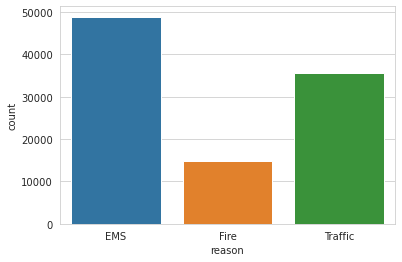

In [7]:
sns.countplot('reason', data=df)

We see, people calls 911 mostly because of emergency service

In [8]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [9]:
df['hour'] = df.timeStamp.apply(lambda x : x.hour)
df['day'] = df.timeStamp.apply(lambda x : x.dayofweek)
df['month'] = df.timeStamp.apply(lambda x : x.month)

In [10]:
df.head(2)

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   

                         addr  e reason  hour  day  month  
0      REINDEER CT & DEAD END  1    EMS    17    3     12  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17    3     12

In [11]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day'] = df['day'].map(dmap)

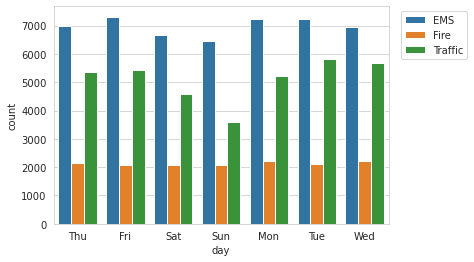

In [12]:
sns.countplot('day',hue='reason', data=df)
plt.legend(bbox_to_anchor=(1.25,1))

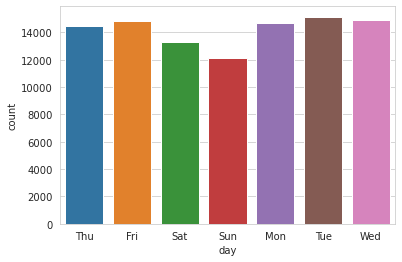

In [13]:
sns.countplot('day', data=df)

number of calls are lowest during weekends

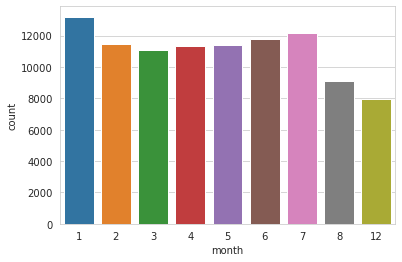

In [14]:
sns.countplot('month', data = df)

from above, we can say emergency related service are lowest during vacation months

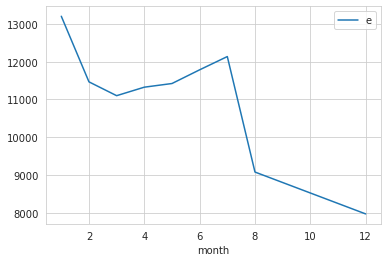

In [15]:
df.groupby('month').count().plot(y='e')

In [16]:
bymonth = df.groupby('month').count()
bymonth.reset_index(inplace=True)

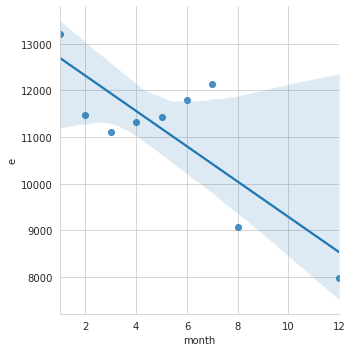

In [17]:
sns.lmplot('month','e',data=bymonth)

from this lmplot, we see traffic of emergency related call were high at the first month of the year and it decreased as the months go by. but between july and august the number of calls were high.

In [18]:
df['date'] = df.timeStamp.apply(lambda x : x.date())

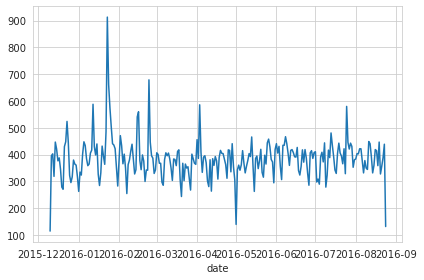

In [19]:
df.groupby('date').count().plot(y='e')
plt.legend().remove()
plt.tight_layout()

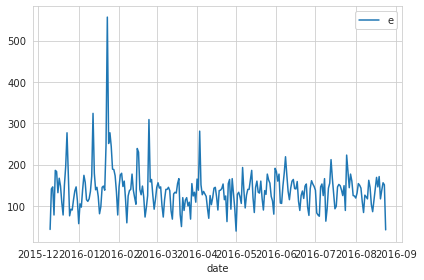

In [20]:
traffic = df[df['reason']=='Traffic']
traffic.groupby('date').count().plot.line(y='e')
plt.tight_layout()

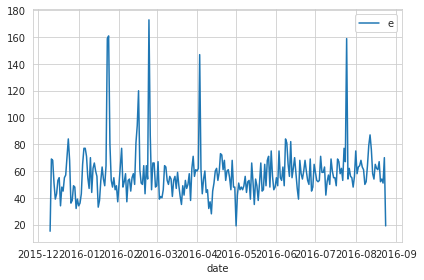

In [21]:
fire = df[df['reason']=='Fire']
fire.groupby('date').count().plot.line(y='e')
plt.tight_layout()

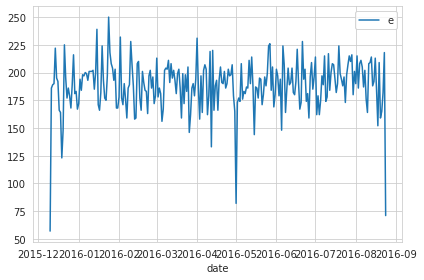

In [22]:
eme = df[df['reason']=='EMS']
eme.groupby('date').count().plot.line(y='e')
plt.tight_layout()

In [23]:
day_hour = df.pivot_table(values='e',index='day',columns='hour',aggfunc='count')
day_hour

hour   0    1    2    3    4    5    6    7    8    9   ...   14   15    16  \
day                                                     ...                   
Fri   275  235  191  175  201  194  372  598  742  752  ...  932  980  1039   
Mon   282  221  201  194  204  267  397  653  819  786  ...  869  913   989   
Sat   375  301  263  260  224  231  257  391  459  640  ...  789  796   848   
Sun   383  306  286  268  242  240  300  402  483  620  ...  684  691   663   
Thu   278  202  233  159  182  203  362  570  777  828  ...  876  969   935   
Tue   269  240  186  170  209  239  415  655  889  880  ...  943  938  1026   
Wed   250  216  189  209  156  255  410  701  875  808  ...  904  867   990   

hour    17   18   19   20   21   22   23  
day                                       
Fri    980  820  696  667  559  514  474  
Mon    997  885  746  613  497  472  325  
Sat    757  778  696  628  572  506  467  
Sun    714  670  655  537  461  415  330  
Thu   1013  810  698  617  553  424  354  
Tue   1019  905  731  647  571  462  274  
Wed   1037  894  686  668  575  490  335  

[7 rows x 24 columns]

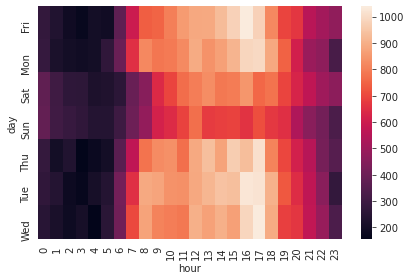

In [24]:
sns.heatmap(day_hour)
plt.tight_layout()

Clearly we can see, number of emergency calls were higher during office hour. and highest at the end of the office hour

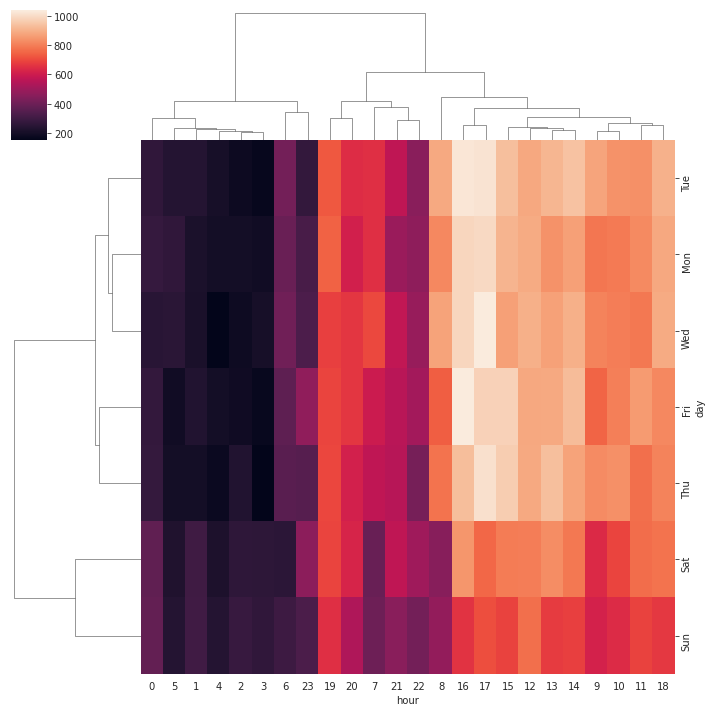

In [25]:
sns.clustermap(day_hour)